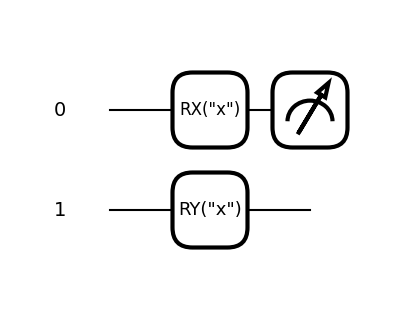

In [68]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def simple_circuit_marked(x):
    qml.RX(x[0], wires=0, id="x")
    qml.RY(x[0], wires=1, id="x")
    # qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(0))

drawer = qml.draw_mpl(simple_circuit_marked)
fig = drawer([0.1])

In [69]:
from pennylane.fourier import circuit_spectrum
freqs = circuit_spectrum(simple_circuit_marked)([0.1])
for k, v in freqs.items():
    print(k, ":", v)


x : [-2.0, -1.0, 0, 1.0, 2.0]


array([<Axes: ylabel='real'>, <Axes: ylabel='imag'>], dtype=object)

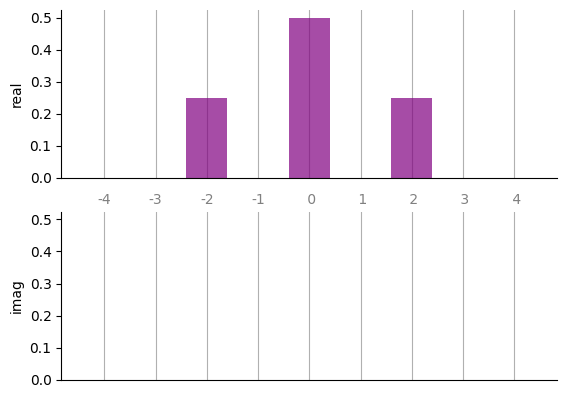

In [71]:
from pennylane.fourier import coefficients
import pennylane as qml
from pennylane import numpy as np
from pennylane.fourier.visualize import *
import matplotlib.pyplot as plt

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def simple_circuit(x):
    qml.RX(x[0], wires=0)
    qml.RY(x[0], wires=0)
    qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(0))

coeffs = coefficients(simple_circuit, 1, 4)
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True) # Set up the axes
bar(coeffs, 1, ax)

array([<Axes: ylabel='real'>, <Axes: ylabel='imag'>], dtype=object)

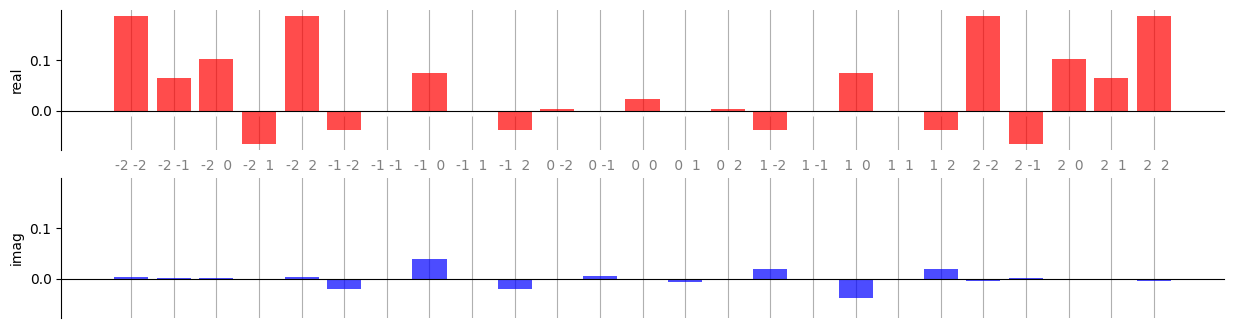

In [29]:
from functools import partial

weights = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])

@qml.qnode(dev)
def circuit_with_weights(w, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[1, 0])

    qml.Rot(*w[0], wires=0)
    qml.Rot(*w[1], wires=1)
    qml.CNOT(wires=[1, 0])

    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[1, 0])

    return qml.expval(qml.PauliZ(0))

coeffs = coefficients(partial(circuit_with_weights, weights), 2, 2)

# Number of inputs is now 2; pass custom colours as well
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 4))
bar(coeffs, 2, ax, colour_dict={"real" : "red", "imag" : "blue"})

array([<Axes: ylabel='real'>, <Axes: ylabel='imag'>], dtype=object)

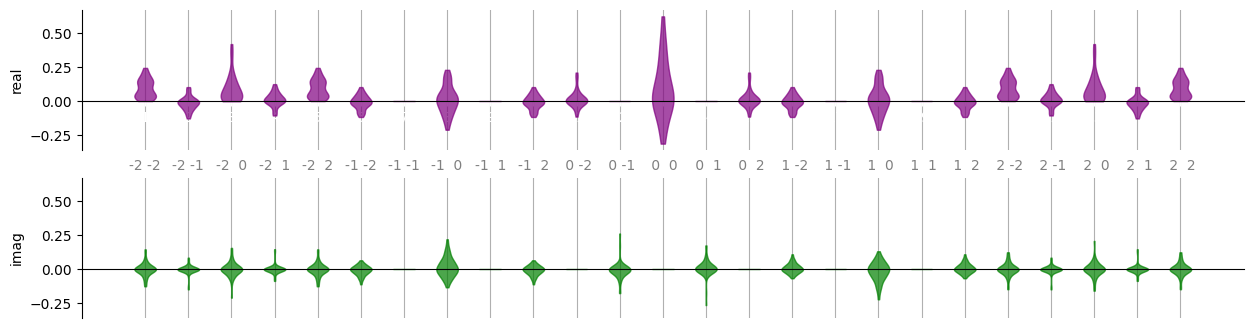

In [62]:
from functools import partial
from pennylane.fourier import coefficients

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_with_weights(w, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[1, 0])

    qml.Rot(*w[0], wires=0)
    qml.Rot(*w[1], wires=1)
    qml.CNOT(wires=[1, 0])

    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[1, 0])

    return qml.expval(qml.PauliZ(0))

coeffs = []
for _ in range(50):
    weights = np.random.normal(0, 1, size=(2, 3))
    c = coefficients(partial(circuit_with_weights, weights), 2, degree=2)
    coeffs.append(np.round(c, decimals=8))

fig, ax = plt.subplots(2, 1, sharey=True, figsize=(15, 4))
violin(coeffs, 2, ax, show_freqs=True)

array([<PolarAxes: >, <PolarAxes: >], dtype=object)

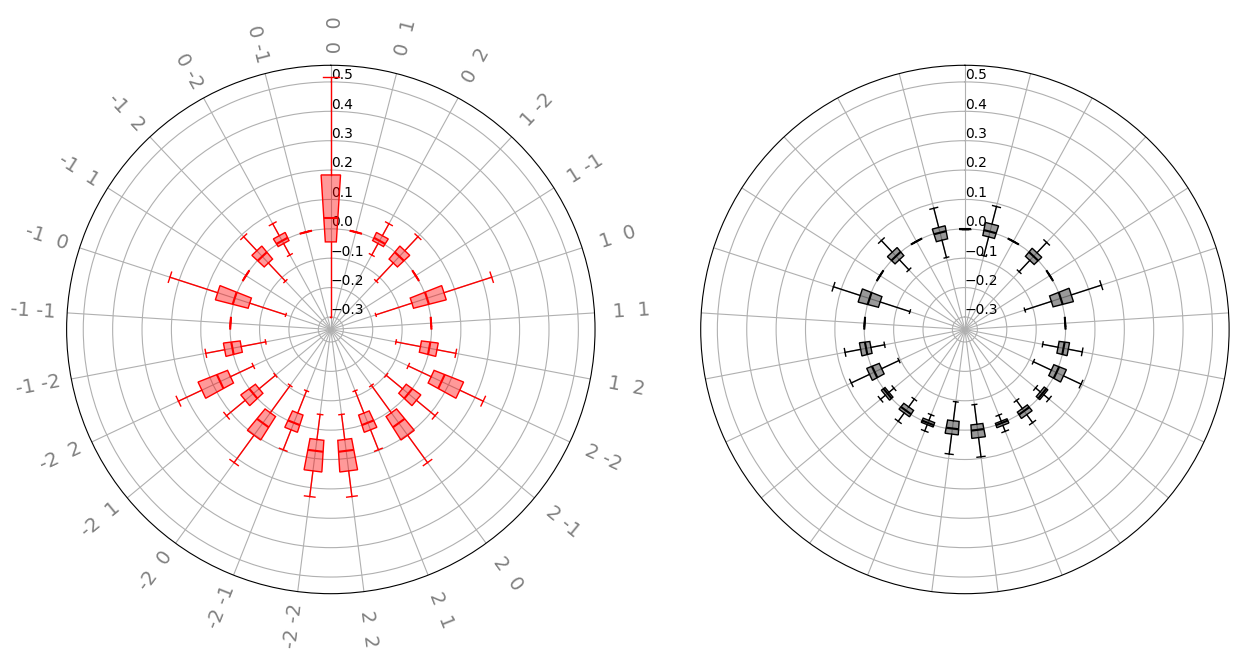

In [26]:
# The subplot axes must be *polar* for the radial plots
fig, ax = plt.subplots(
    1, 2, sharex=True, sharey=True,
    subplot_kw=dict(polar=True),
    figsize=(15, 8)
)
radial_box(coeffs, 2, ax, show_freqs=True, show_fliers=False)